In [ ]:
# 📦 Install required libraries
!pip install pandas numpy scikit-learn nltk matplotlib seaborn joblib tqdm

# ⬇ Download NLTK datasets
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# ⬇ Download spaCy model
!python -m spacy download en_core_web_sm

# 📥 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import re 
from collections import Counter
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 3.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.8 MB 4.0 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 3.9 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 3.9 MB/s eta 0:00:03
     ----------- ---------------------------- 3.7/12.8 MB 3.9 MB/s eta 0:00:03
     ------------- -------------------------- 4.5/12.8 MB 3.9 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 3.9 MB/s eta 0:00:02
     ------------------ --------------------- 6.0/12.8 MB 3.9 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 4.0 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 3.9 MB/s eta 0:00:02
     -------------------------- ------------- 8.4/12.8 MB 3.9 MB/s eta 0:00:02
     ---------------------------- ----------- 9.2/12.8 MB 3


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data= pd.read_csv('Reviews.csv')
display(data.head())

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
print(data.shape)

(568454, 10)


In [4]:
data = data[['Score', 'Text']]  # keep only these two columns
display(data.head())

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [5]:
print(data.isnull().sum())

Score    0
Text     0
dtype: int64


In [6]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for cleaning text
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, numbers, special chars
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to 'Text' column
data['clean_text'] = data['Text'].astype(str).apply(preprocess_text)

# Show before/after
print("Before cleaning:")
print(data['Text'].head(3))
print("\nAfter cleaning:")
print(data['clean_text'].head(3))

Before cleaning:
0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
Name: Text, dtype: object

After cleaning:
0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
Name: clean_text, dtype: object


C:\Users\moham\AppData\Local\Temp\ipykernel_24488\3529709671.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pos_df, x='count', y='word', ax=axes[0], palette="Greens_r")
C:\Users\moham\AppData\Local\Temp\ipykernel_24488\3529709671.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neg_df, x='count', y='word', ax=axes[1], palette="Reds_r")


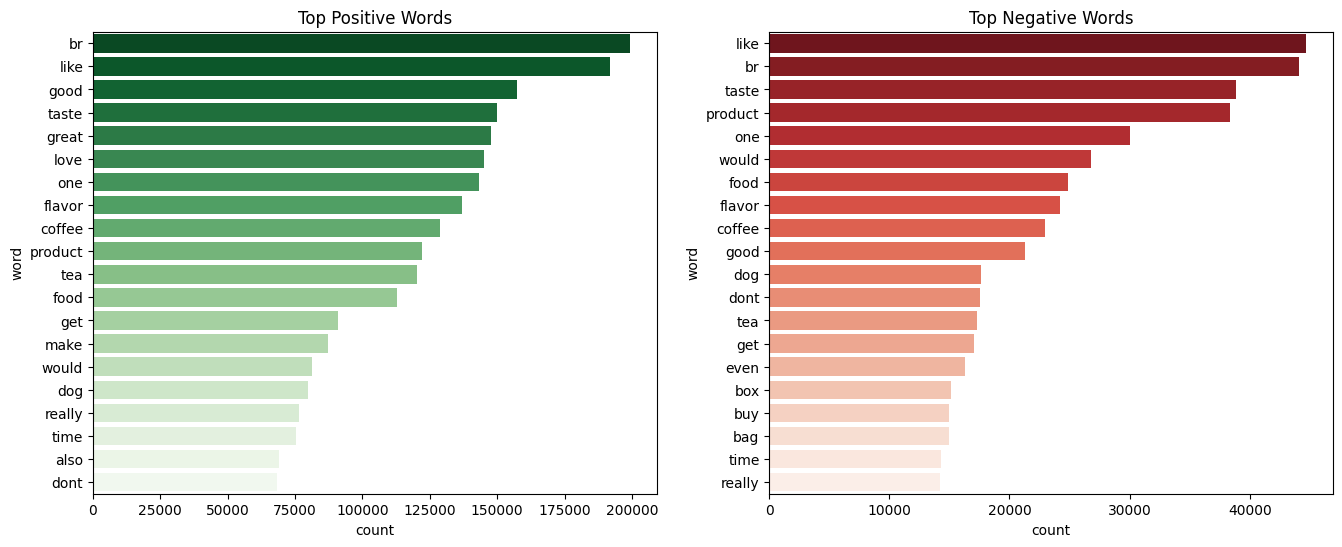

In [7]:
# Step 1: Create sentiment labels
# Assuming Score: 1-2 = Negative, 4-5 = Positive, ignore 3 (neutral)
data = data[data['Score'] != 3]  # Remove neutral reviews
data['sentiment'] = data['Score'].apply(lambda x: 1 if x > 3 else 0)

# Step 2: Separate positive & negative reviews
positive_words = " ".join(data[data['sentiment'] == 1]['clean_text']).split()
negative_words = " ".join(data[data['sentiment'] == 0]['clean_text']).split()

# Step 3: Count most common words
pos_counts = Counter(positive_words).most_common(20)
neg_counts = Counter(negative_words).most_common(20)

# Convert to DataFrames for plotting
pos_df = pd.DataFrame(pos_counts, columns=['word', 'count'])
neg_df = pd.DataFrame(neg_counts, columns=['word', 'count'])

# Step 4: Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=pos_df, x='count', y='word', ax=axes[0], palette="Greens_r")
axes[0].set_title("Top Positive Words")

sns.barplot(data=neg_df, x='count', y='word', ax=axes[1], palette="Reds_r")
axes[1].set_title("Top Negative Words")

plt.show()

In [8]:
# 1. Split features and labels
X = data['clean_text']
y = data['sentiment']  # 1 = positive, 0 = negative

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# 3. Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# 4. Predictions
y_pred = model.predict(X_test_vec)

# 5. Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9296045186995426

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75     16407
           1       0.94      0.98      0.96     88756

    accuracy                           0.93    105163
   macro avg       0.89      0.83      0.85    105163
weighted avg       0.93      0.93      0.93    105163



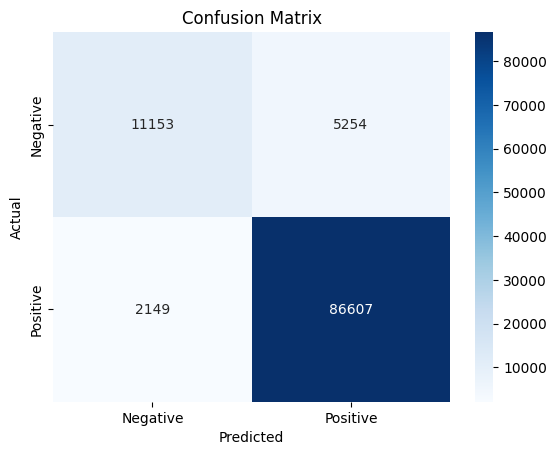

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
from sklearn.naive_bayes import MultinomialNB

# Split features and labels
X = data['clean_text']
y = data['sentiment']

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8901134429409583

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.33      0.48     16379
           1       0.89      0.99      0.94     88784

    accuracy                           0.89    105163
   macro avg       0.90      0.66      0.71    105163
weighted avg       0.89      0.89      0.87    105163



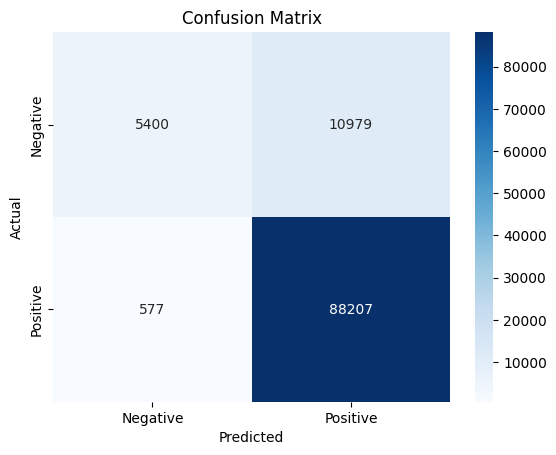

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()